<a href="https://colab.research.google.com/github/dhruvgoe/ML_Algorithms_DefaultCreditCardClients/blob/main/ML_PROJECT_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Default of Credit Card Clients

##About Dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

#### Content
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

# Data Exploration and Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import sys

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/026_DHRUV_MACHINE_LEARNING_PROJECT/UCI_Credit_Card.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

First thing we can see is a typo. The column 'PAY_0' should be called 'PAY_1' to follow nomenclature of columns 'BILL_AMT' and 'PAY_AMT'.

In [ ]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

There is no null, which is good.

Based on what the dataset description and the `head()` and `info()` functions are telling, some feature are categorical (all nominal):
- SEX
- EDUCATION
- MARRIAGE
- PAY_1
- PAY_2
- PAY_3
- PAY_4
- PAY_5
- PAY_6

And the others are numerical:
- LIMIT_BAL
- AGE
- BILL_AMT1
- BILL_AMT2
- BILL_AMT3
- BILL_AMT4
- BILL_AMT5
- BILL_AMT6
- PAY_AMT1
- PAY_AMT2
- PAY_AMT3
- PAY_AMT4
- PAY_AMT5
- PAY_AMT6

In [ ]:
categorical_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_1',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'default.payment.next.month'
]

df[categorical_features].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200
std,0.489129,0.790349,0.521970,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


We can see inconsistencies with the dataset description.
- MARRIAGE start at 0 and not at 1
- PAY start at -2 and not -1. But this could be an error of description since the max is 8 for all PAY.
- EDUCATION start at 0 and not at 1

In [ ]:
# Fixing marriage
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: 3 if x == 0 else x)

# Fixing education
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)

df[categorical_features].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.842267,1.557267,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200
std,0.489129,0.744494,0.521405,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062
min,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,4.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


In [ ]:
numerical_features = [
    'LIMIT_BAL',
    'AGE',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6'
]

df[numerical_features].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


#DATA ANALYSIS

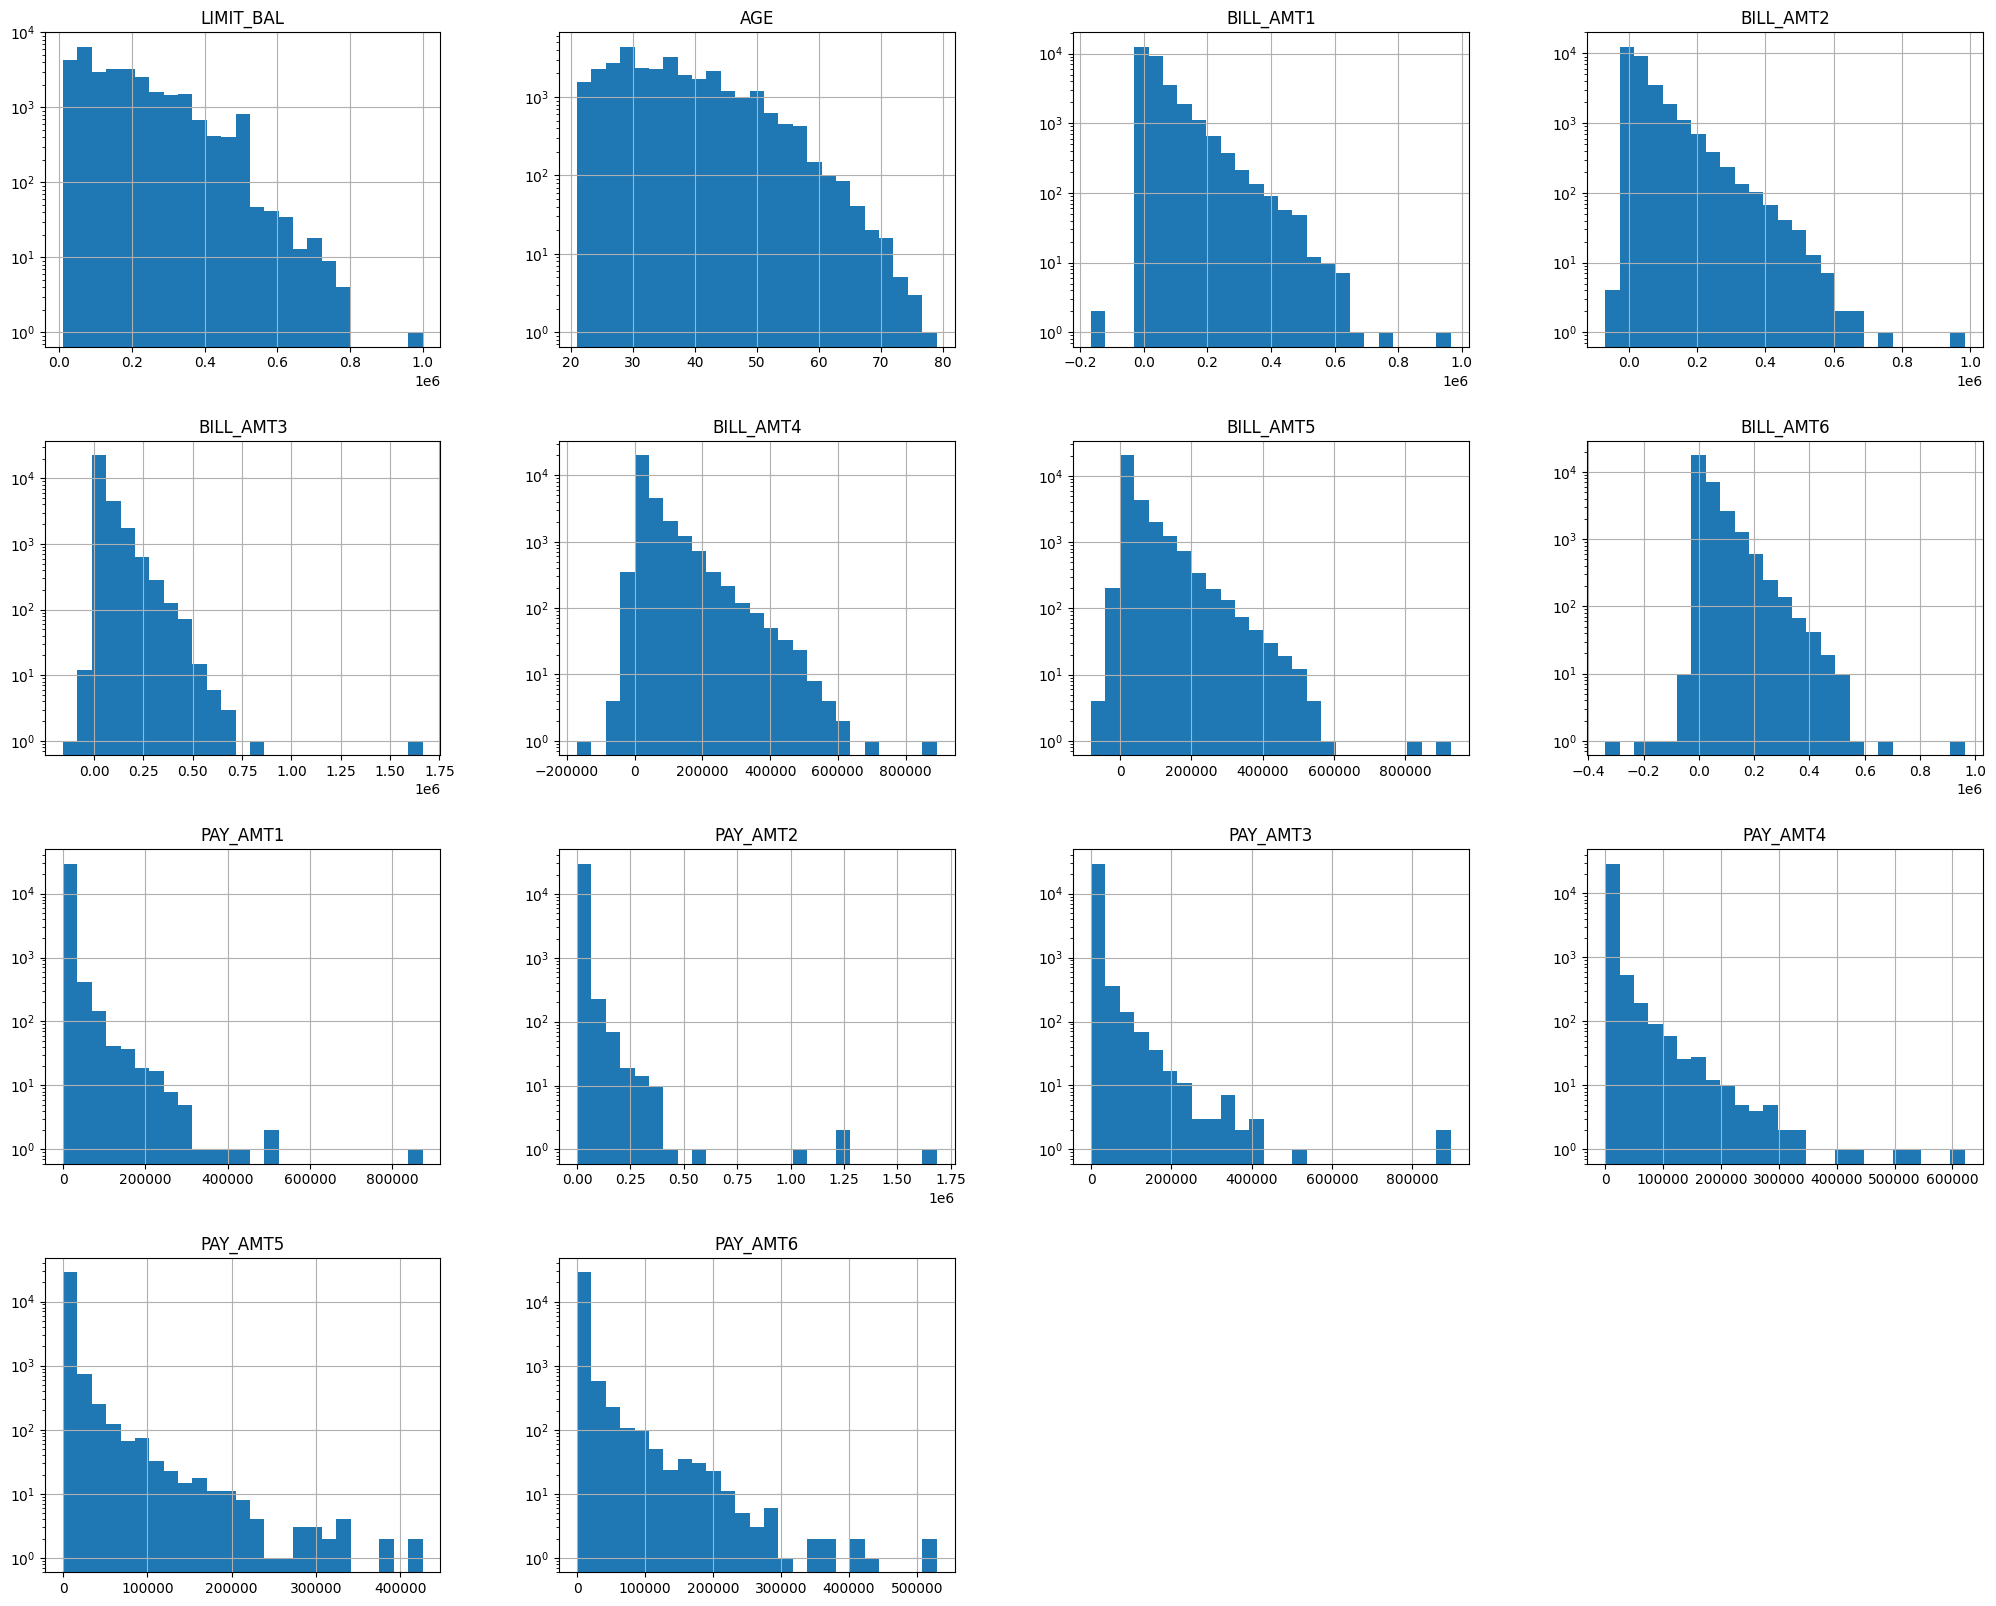

In [ ]:
fig = plt.figure(figsize=(25,20))
ax = fig.gca()
# Showing with log on y axis to better visualise all values
df[numerical_features].hist(bins=25, ax=ax, log=True);

##DATA PREPROCESSING

We can see that the distributions of numeric features are almost all exponential.

In [ ]:
# It does not seems to help models when we bin good and bad paying behaviour togheter
# for PAY_X in categorical_features[3:-1]:
#   df[PAY_X] = df[PAY_X].apply(lambda x: 0 if x in [-2, -1, 0] else 1)

# SVN of numerical features
df[numerical_features] = (df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std()

# One Hot Encoding of all categorical features since there is no ordinal feature
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='if_binary')

one_hot_encoder_df = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_features[:-1]]).toarray(), index=df.index)
one_hot_encoder_df.columns = one_hot_encoder.get_feature_names_out(categorical_features[:-1])

df_prepro = df.copy().join(one_hot_encoder_df)
df_prepro = df_prepro.drop(columns=categorical_features[:-1])
df_prepro.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_1_-2', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3',
       'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-2',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1',
       'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0',
       'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6',
       'PAY_4_7', 'PAY_4_8', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PA

In [ ]:
X = df_prepro.copy()
X = X.drop(columns=['default.payment.next.month'])
Y = df_prepro['default.payment.next.month'].copy()

# Test - train split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
# Our dataset is slightly imbalanced
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(Y), y=Y)

#DECISION TREE

In [ ]:
# Decision tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

params = {
    'max_depth': [2, 3, 5, 6, 10, 20, 50],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=4, n_jobs=-1, verbose=1, refit='f1', scoring=['f1', 'accuracy'])

grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
clf = grid_search.best_estimator_.fit(X_train, Y_train)
y_pred1 = clf.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(Y_test, y_pred1)))
print('f1: {:.4f}'.format(f1_score(Y_test, y_pred1)))

Fitting 4 folds for each of 70 candidates, totalling 280 fits
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 100}
Accuracy: 0.7781
f1: 0.5226


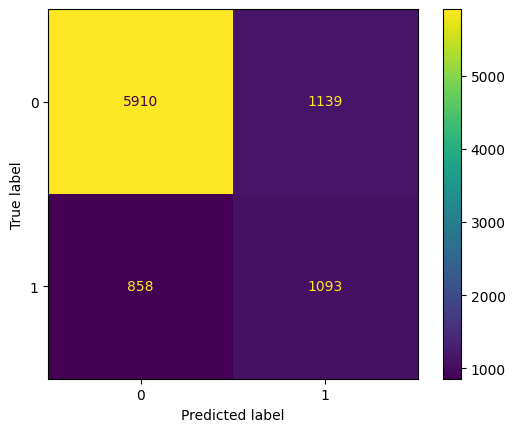

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_pred1), display_labels=clf.classes_)
disp.plot()
plt.show()

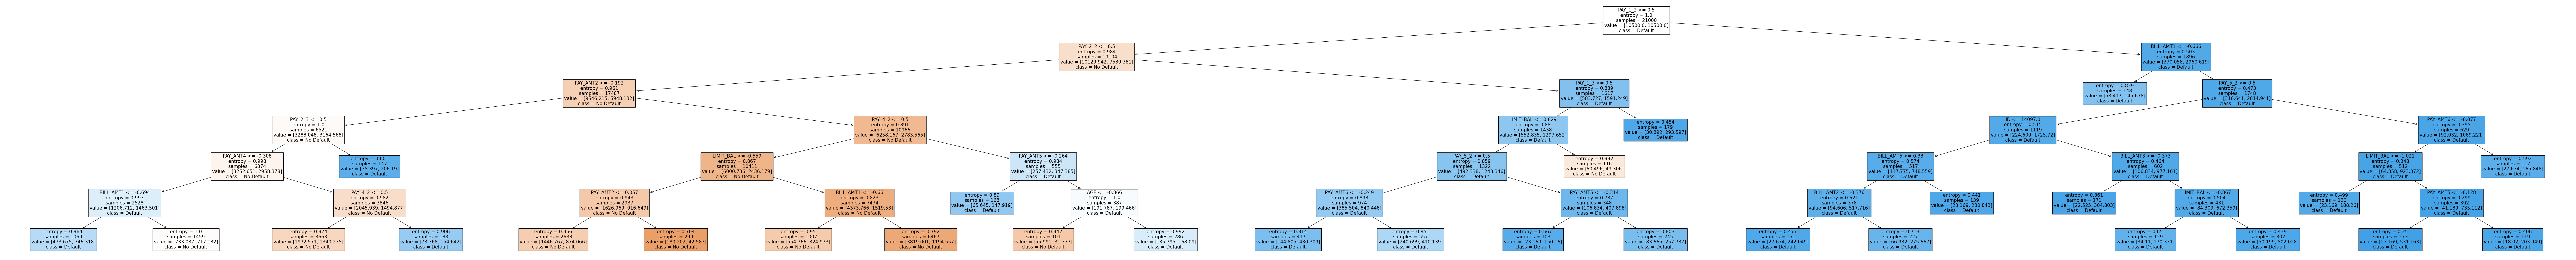

In [ ]:
plt.figure(figsize=(150, 15))
_ = plot_tree(clf, feature_names=X_train.columns, class_names=['No Default', 'Default'], filled=True, fontsize=15);
plt.savefig('./decision_tree.png')

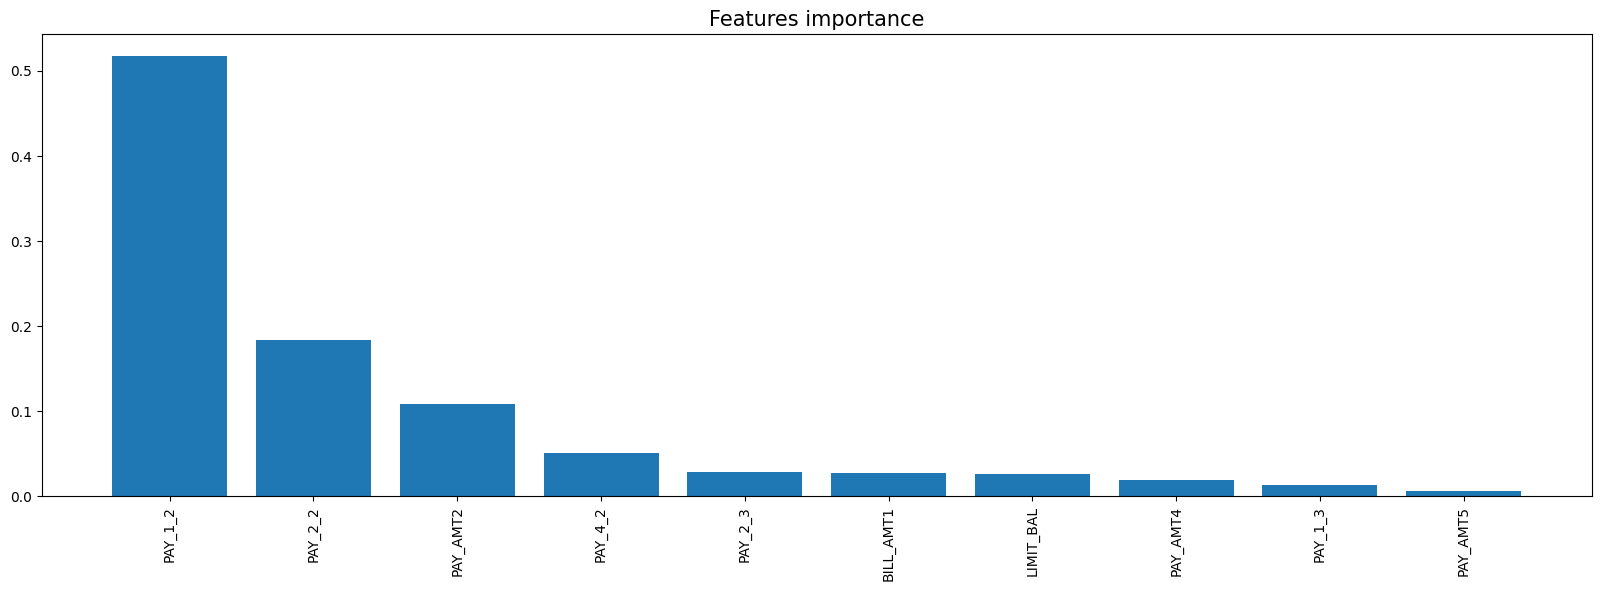

In [ ]:
feature_importance_df = pd.DataFrame({'Feature_name': X_train.columns, 'Importance': clf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (20, 6))
plt.title('Features importance', fontsize=15)
ax = plt.bar(feature_importance_df['Feature_name'][:10], feature_importance_df['Importance'][:10])
plt.xticks(rotation=90)
plt.show()

#LOGISTIC REGRESSION

In [ ]:
%%time
# Logistic regression
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

params = {
    'C': [0.1, 0.5, 1.0, 2.0, 5.0],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=params, n_jobs=1, verbose=1, refit='f1', scoring=['f1', 'accuracy'])
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
clf = grid_search.best_estimator_.fit(X_train, Y_train)

y_pred2 = clf.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(Y_test, y_pred2)))
print('f1: {:.4f}'.format(f1_score(Y_test, y_pred2)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 0.1, 'class_weight': 'balanced', 'solver': 'newton-cg'}
Accuracy: 0.7773
f1: 0.5289
CPU times: user 4min 3s, sys: 33.2 s, total: 4min 36s
Wall time: 3min 5s


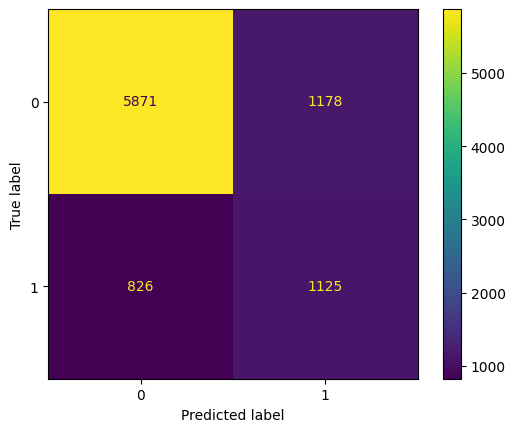

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_pred2), display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
%%time
# SVM
# https://scikit-learn.org/stable/modules/svm.html#classification
from sklearn.svm import SVC

params = {
    'gamma': ['auto'],
    'C': [1.0],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}
grid_search = GridSearchCV(estimator=SVC(), param_grid=params, n_jobs=4, verbose=1, refit='f1', scoring=['f1', 'accuracy'])
grid_search.fit(X_train, Y_train)
print(grid_search.best_estimator_)
clf = grid_search.best_estimator_.fit(X_train, Y_train)
y_pred2 = clf.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(Y_test, y_pred2)))
print('f1: {:.4f}'.format(f1_score(Y_test, y_pred2)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
SVC(class_weight='balanced', gamma='auto')
Accuracy: 0.5944
f1: 0.2986
CPU times: user 2min 33s, sys: 341 ms, total: 2min 34s
Wall time: 6min 25s


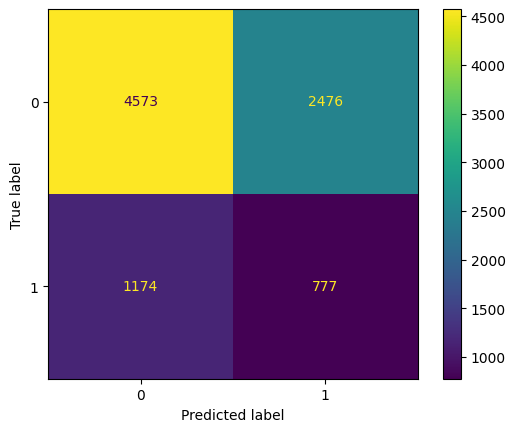

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_pred2), display_labels=clf.classes_)
disp.plot()
plt.show()

#K-NEAREST NEIGHBOURS

In [ ]:
# KNN
# https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-nearest-neighbors
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors': [3, 5, 10, 15, 50, 100, 150, 200, 1000]
}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, n_jobs=None, verbose=1, refit='f1', scoring=['f1', 'accuracy'])
grid_search.fit(X_train, Y_train)

neigh = grid_search.best_estimator_.fit(X_train, Y_train)
y_pred3 = neigh.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(Y_test, y_pred3)))
print('f1: {:.4f}'.format(f1_score(Y_test, y_pred3)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Accuracy: 0.7213
f1: 0.1868


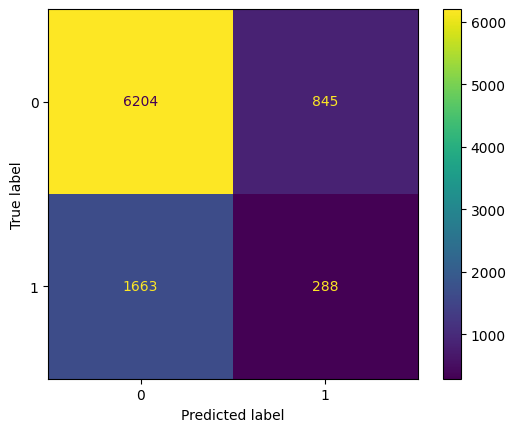

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_pred3), display_labels=clf.classes_)
disp.plot()
plt.show()

#NAIVE BAYES

In [ ]:
# Naive Bayes
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train, Y_train)

y_pred4 = clf.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(Y_test, y_pred4)))
print('f1: {:.4f}'.format(f1_score(Y_test, y_pred4)))

Accuracy: 0.7892
f1: 0.5266


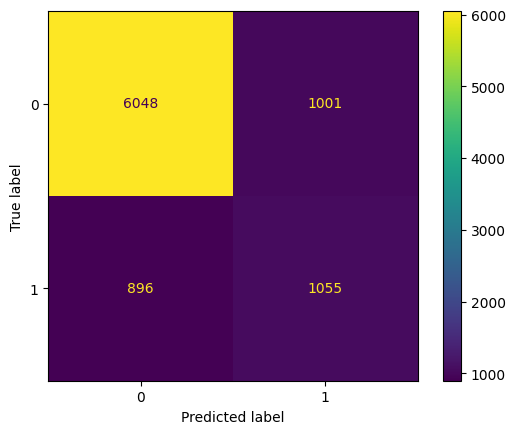

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_pred4), display_labels=clf.classes_)
disp.plot()
plt.show()

#RANDOM FOREST

In [ ]:
# Random forest
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [2, 3, 5, 6, 10, 20, 50],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=4, n_jobs=-1, verbose=1, refit='f1', scoring=['f1', 'accuracy'])

grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
clf = grid_search.best_estimator_.fit(X_train, Y_train)

y_pred5 = clf.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(Y_test, y_pred5)))
print('f1: {:.4f}'.format(f1_score(Y_test, y_pred5)))

Fitting 4 folds for each of 70 candidates, totalling 280 fits
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}
Accuracy: 0.7918
f1: 0.5418


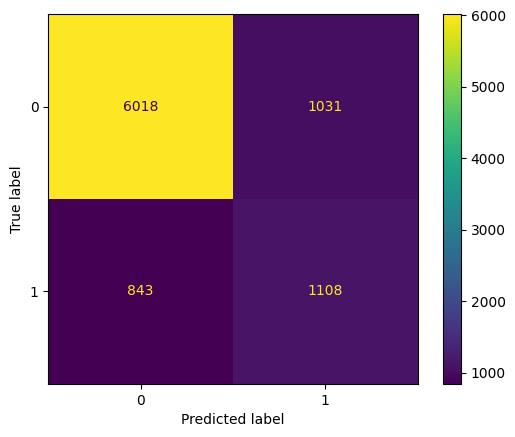

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_pred5), display_labels=clf.classes_)
disp.plot()
plt.show()

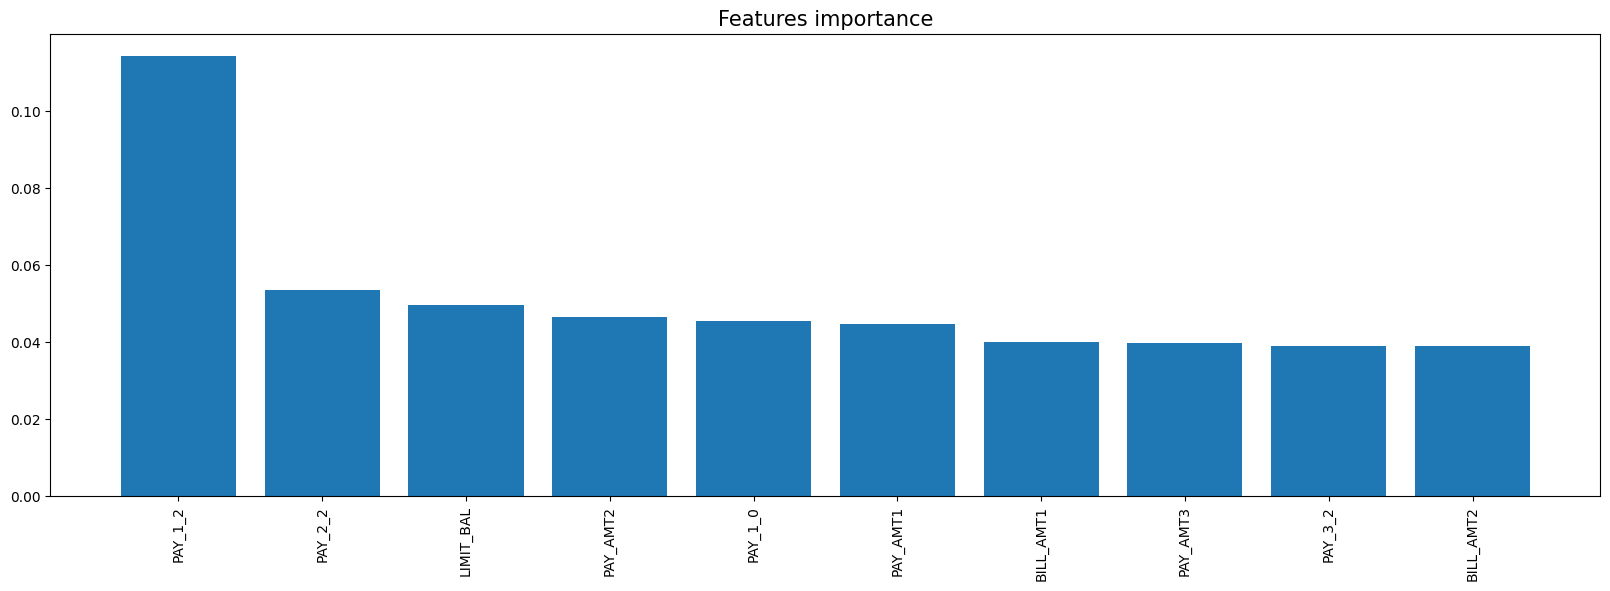

In [ ]:
feature_importance_df = pd.DataFrame({'Feature_name': X_train.columns, 'Importance': clf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (20, 6))
plt.title('Features importance', fontsize=15)
ax = plt.bar(feature_importance_df['Feature_name'][:10], feature_importance_df['Importance'][:10])
plt.xticks(rotation=90)
plt.show()

##COMPARISON BETWEEN ACCURACY

In [ ]:
Accuracy = [round(accuracy_score(Y_test,y_pred1)*100,2),round(accuracy_score(Y_test,y_pred2)*100,2),
           round(accuracy_score(Y_test,y_pred3)*100,2),round(accuracy_score(Y_test,y_pred4)*100,2),
           round(accuracy_score(Y_test,y_pred5)*100,2)]

Accuracy

[77.81, 59.44, 72.13, 78.92, 79.18]

In [ ]:
l = ['Logistic Regression','Random Forest','KNN','Naive Bayes','Desicion Tree']

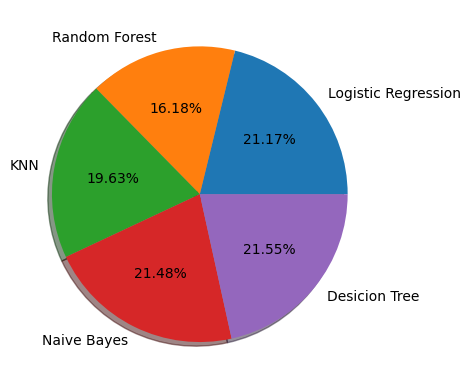

In [ ]:
plt.pie(Accuracy,labels=l,shadow=True,autopct='%1.2f%%')
plt.show()

<Axes: >

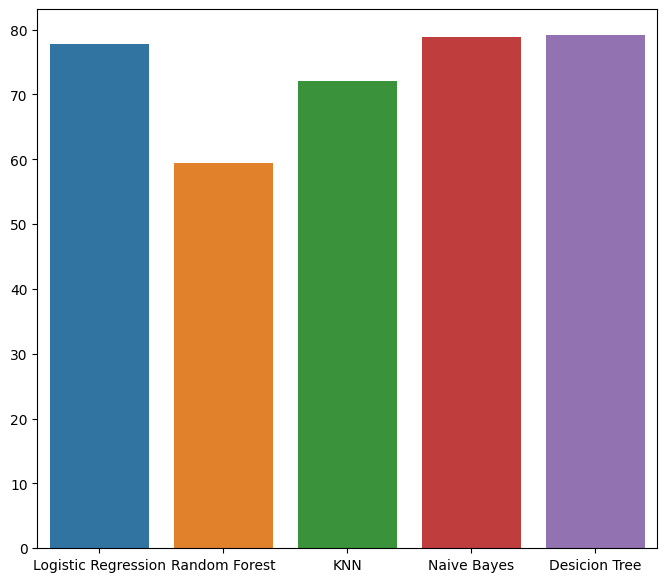

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.barplot(x = l,y=Accuracy)